## Análisis de texto

En este caso práctico haremos una revisión general de cómo podemos analizar y procesar textos desde una perspectiva descriptiva. 

El caso está estructurado así:

1. Carga y exploración de texto
2. Procesos de limpieza y transformación en texto
3. Representaciones de conteos

**Contexto:** Muchas empresas y entidades estan monitoreando constantemente los comentarios que hay en redes sociales sobre sus productos y servicios para identificar rápidamente molestias e inquietudes de sus clientes. Así poder tomar decisiones y medidas eficientemente evitando que su imagen se vea damnificada

**Pregunta de negocio:** En este caso analizaremos una muestra de tweets relacionados con el banco Davivienda. El objetivo es analizar cuáles pueden ser los temas tendencia en estos tweets y qué hallazgos se encuentran en ellos

In [1]:
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pandas as pd
import re
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
tx = pd.read_csv('data/tweets.csv',encoding='latin-1')

In [3]:
tx.head()

,texto
0,RT @davicorredores: Actualizamos nuestro pronó...
1,Explicó que en lo corrido del año los resultad...
2,Nuevo #TipoDeCambio en Banco Davivienda (Costa...
3,No les pasa que se sienten como davivienda. Ya...
4,"Actualizamos nuestro pronóstico de inflación, ..."


## Manejo de textos

**Tokenizar oraciones**

In [4]:
tw = tx['texto']
tw.head()
tw[0]

'RT @davicorredores: Actualizamos nuestro pronóstico de inflación, ahora en @davivienda esperamos una inflación de 3.97% al finalizar 2019. Conozca más aquí #PresentaciónSemanal #Mercados #Acciones #Colcap #TES'

In [5]:
oraciones = nltk.sent_tokenize(tw[0])
for oracion in oraciones:
    print(oracion)
    print()

RT @davicorredores: Actualizamos nuestro pronóstico de inflación, ahora en @davivienda esperamos una inflación de 3.97% al finalizar 2019.

Conozca más aquí #PresentaciónSemanal #Mercados #Acciones #Colcap #TES



**Tokenizar palabras**

In [6]:
oraciones = nltk.sent_tokenize(tx['texto'][1])
for oracion in oraciones:
    palabras = nltk.word_tokenize(oracion)
    print(oracion)
    print(palabras)
    print()

Explicó que en lo corrido del año los resultados del grueso de las compañías son saludables, jalonados por menores impuestos, menor apalancamiento y costo de crédito, lo cual favorece las utilidades.
['Explicó', 'que', 'en', 'lo', 'corrido', 'del', 'año', 'los', 'resultados', 'del', 'grueso', 'de', 'las', 'compañías', 'son', 'saludables', ',', 'jalonados', 'por', 'menores', 'impuestos', ',', 'menor', 'apalancamiento', 'y', 'costo', 'de', 'crédito', ',', 'lo', 'cual', 'favorece', 'las', 'utilidades', '.']

#ValoraAnalitik
['#', 'ValoraAnalitik']



**Tamaño de los tweets**

In [7]:
tx['largo'] = tx['texto'].apply(len)
tx.head()

,texto,largo
0,RT @davicorredores: Actualizamos nuestro pronó...,209
1,Explicó que en lo corrido del año los resultad...,215
2,Nuevo #TipoDeCambio en Banco Davivienda (Costa...,121
3,No les pasa que se sienten como davivienda. Ya...,74
4,"Actualizamos nuestro pronóstico de inflación, ...",189


In [8]:
tx['largo'].mean()

183.03341352579525

In [9]:
print(tx['largo'].min())
print(tx['largo'].max())

13
578


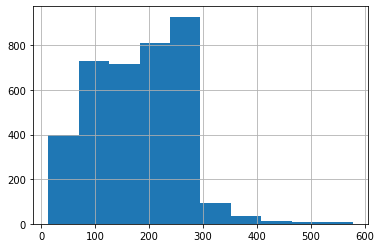

In [10]:
tx['largo'].hist()

**Wordclouds**

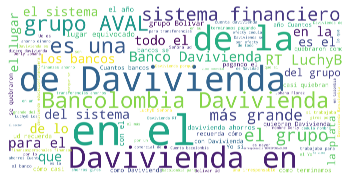

In [11]:
texto_c = ''.join(tx.texto)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(texto_c)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Palabras o tokens más frecuentes

In [12]:
tokenized_words = nltk.word_tokenize(texto_c)
word_freq = Counter(tokenized_words)
word_freq.most_common(20)

[('@', 6148),
 ('de', 4523),
 (',', 3824),
 ('.', 3750),
 ('?', 2887),
 ('el', 2593),
 (':', 2558),
 ('en', 2546),
 ('#', 2303),
 ('a', 2163),
 ('Davivienda', 2136),
 ('que', 1975),
 ('la', 1975),
 ('y', 1947),
 ('davivienda', 1301),
 ('es', 1230),
 ('del', 1031),
 ('por', 1029),
 ('no', 910),
 ('con', 899)]

Al sacar los tokens más comunes en esta muestra de tweets observamos como algunos signos de puntuación resultan ser los más comunes. Esto indica que debemos hacer un proceso de limpieza de los textos

## Limpieza y pre-procesamiento

In [13]:
texto_c = ''.join(tx.texto)
texto_c[:400]

'RT @davicorredores: Actualizamos nuestro pronóstico de inflación, ahora en @davivienda esperamos una inflación de 3.97% al finalizar 2019. Conozca más aquí #PresentaciónSemanal #Mercados #Acciones #Colcap #TESExplicó que en lo corrido del año los resultados del grueso de las compañías son saludables, jalonados por menores impuestos, menor apalancamiento y costo de crédito, lo cual favorece las uti'

**Llevar todas las palabras a minúsculas**

In [14]:
texto_c = texto_c.lower()

In [15]:
texto_c[:400]

'rt @davicorredores: actualizamos nuestro pronóstico de inflación, ahora en @davivienda esperamos una inflación de 3.97% al finalizar 2019. conozca más aquí #presentaciónsemanal #mercados #acciones #colcap #tesexplicó que en lo corrido del año los resultados del grueso de las compañías son saludables, jalonados por menores impuestos, menor apalancamiento y costo de crédito, lo cual favorece las uti'

**Remover @, # con expresiones regulares**

In [16]:
texto_c = re.sub(r'\@\w+|\#','', texto_c)
texto_c[:400]

'rt : actualizamos nuestro pronóstico de inflación, ahora en  esperamos una inflación de 3.97% al finalizar 2019. conozca más aquí presentaciónsemanal mercados acciones colcap tesexplicó que en lo corrido del año los resultados del grueso de las compañías son saludables, jalonados por menores impuestos, menor apalancamiento y costo de crédito, lo cual favorece las utilidades. valoraanalitiknuevo ti'

**Remover signos de puntuación**

In [17]:
texto_c = texto_c.translate(str.maketrans('', '', string.punctuation))
texto_c[0:400]

'rt  actualizamos nuestro pronóstico de inflación ahora en  esperamos una inflación de 397 al finalizar 2019 conozca más aquí presentaciónsemanal mercados acciones colcap tesexplicó que en lo corrido del año los resultados del grueso de las compañías son saludables jalonados por menores impuestos menor apalancamiento y costo de crédito lo cual favorece las utilidades valoraanalitiknuevo tipodecambi'

Luego de hacer esta limpieza inicial cómo varían las palabras/tokens más frecuentes

In [18]:
tokenized_words = nltk.word_tokenize(texto_c)
word_freq = Counter(tokenized_words)
word_freq.most_common(20)

[('de', 4656),
 ('el', 2939),
 ('en', 2787),
 ('davivienda', 2701),
 ('a', 2386),
 ('la', 2213),
 ('y', 2082),
 ('que', 2052),
 ('no', 1311),
 ('es', 1279),
 ('por', 1158),
 ('del', 1037),
 ('se', 977),
 ('con', 929),
 ('los', 909),
 ('para', 824),
 ('un', 785),
 ('una', 724),
 ('al', 647),
 ('si', 591)]

**¿Qué tipo de palabras encontramos en la lista de las más frecuentes?**

Naturalmente las palabras más comunes suelen ser "palabras vacías" que no añaden mucho significado al texto como artículos, pronombres y preposiciones. Lo más aconsejable es no considerarlas en el análisis ya que traen mucho ruido y no permiten identificar aquellas palabras que si son relevantes para el análisis

**Stopwords**

In [19]:
print(stopwords.words("spanish"))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

Removamos de nuestro texto las stopwords

In [20]:
stop_words = set(stopwords.words("spanish"))
tweet_tokens = nltk.word_tokenize(texto_c)
texto_f = [w for w in tweet_tokens if not w in stop_words]

In [21]:
print(len(texto_c))
print(len(texto_f))

590350
54710


Las stopwords en este caso representaban casi un 90% del total de las palabras

## Conteos de frecuencias

Una vez hecha la limpieza ya podemos entonces verificar cuáles son las palabras más frecuentes en esta muestra de tweets

In [22]:
word_freq = Counter(texto_f)
word_freq.most_common(20)

[('davivienda', 2701),
 ('si', 591),
 ('banco', 502),
 ('cuenta', 484),
 ('grupo', 446),
 ('bancos', 427),
 ('bancolombia', 419),
 ('ud', 417),
 ('ahorros', 358),
 ('sistema', 354),
 ('dinero', 328),
 ('financiero', 320),
 ('aval', 298),
 ('grande', 289),
 ('colombia', 274),
 ('día', 274),
 ('rt', 265),
 ('4', 241),
 ('año', 238),
 ('plata', 231)]

**n-gramas**

In [23]:
list(ngrams(texto_f, 2)) #ngrams(word_tokens,n) gives the n-grams.

[('rt', 'actualizamos'),
 ('actualizamos', 'pronóstico'),
 ('pronóstico', 'inflación'),
 ('inflación', 'ahora'),
 ('ahora', 'esperamos'),
 ('esperamos', 'inflación'),
 ('inflación', '397'),
 ('397', 'finalizar'),
 ('finalizar', '2019'),
 ('2019', 'conozca'),
 ('conozca', 'aquí'),
 ('aquí', 'presentaciónsemanal'),
 ('presentaciónsemanal', 'mercados'),
 ('mercados', 'acciones'),
 ('acciones', 'colcap'),
 ('colcap', 'tesexplicó'),
 ('tesexplicó', 'corrido'),
 ('corrido', 'año'),
 ('año', 'resultados'),
 ('resultados', 'grueso'),
 ('grueso', 'compañías'),
 ('compañías', 'saludables'),
 ('saludables', 'jalonados'),
 ('jalonados', 'menores'),
 ('menores', 'impuestos'),
 ('impuestos', 'menor'),
 ('menor', 'apalancamiento'),
 ('apalancamiento', 'costo'),
 ('costo', 'crédito'),
 ('crédito', 'favorece'),
 ('favorece', 'utilidades'),
 ('utilidades', 'valoraanalitiknuevo'),
 ('valoraanalitiknuevo', 'tipodecambio'),
 ('tipodecambio', 'banco'),
 ('banco', 'davivienda'),
 ('davivienda', 'costa'),
 ('

In [24]:
def top_k_ngrams(word_tokens,n,k):
    
    ## lista de n-gramas
    n_gram_list = list(ngrams(word_tokens, n))

    ### Tomar cada ngrama como un string separado
    n_gram_strings = [' '.join(each) for each in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)

In [25]:
bigram = top_k_ngrams(texto_f,2,20)
bigram

[('sistema financiero', 242), ('grupo aval', 231), ('bancolombia davivienda', 229), ('cuenta davivienda', 155), ('grupo bolivar', 138), ('banco davivienda', 135), ('ahorros 506100124201', 134), ('casi quiebran', 132), ('davivienda año', 132), ('4 x', 132), ('x 1000', 132), ('quiebran davivienda', 131), ('año 99', 131), ('1000 si', 131), ('ud recuerda', 130), ('recuerda cómo', 130), ('cómo casi', 130), ('99 cuantos', 130), ('cuantos bancos', 130), ('bancos quebraron', 130)]


**Trigrams**

In [26]:
top_k_ngrams(texto_f,3,10)

[('casi quiebran davivienda', 131), ('davivienda año 99', 131), ('4 x 1000', 131), ('x 1000 si', 131), ('ud recuerda cómo', 130), ('recuerda cómo casi', 130), ('cómo casi quiebran', 130), ('quiebran davivienda año', 130), ('año 99 cuantos', 130), ('99 cuantos bancos', 130)]


## Llevar texto a vectores

In [27]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(texto_f)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df.head()

,00,000,000021074034,000735672307126481,003045375618,00374637467467,004100145707,01,018000123838,02,...,últimas,último,últimos,únete,única,únicamente,único,únicos,úsela,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Otras transformaciones de texto

**lematizacion**

In [28]:
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer

nltk.download('wordnet')

from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [29]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Provide a word to be lemmatized
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


**POS**

In [30]:
import nltk
nltk.download('averaged_perceptron_tagger')

text_word_token = nltk.word_tokenize("Juliana is having a nice day")

nltk.pos_tag(text_word_token)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Juliana', 'NNP'),
 ('is', 'VBZ'),
 ('having', 'VBG'),
 ('a', 'DT'),
 ('nice', 'JJ'),
 ('day', 'NN')]

In [31]:
text_word_token = nltk.word_tokenize("Juliana tiene un buen día")

nltk.pos_tag(text_word_token)


[('Juliana', 'NNP'),
 ('tiene', 'NN'),
 ('un', 'JJ'),
 ('buen', 'NN'),
 ('día', 'NN')]

## Conclusiones

- Analizar texto requiere de una gran tarea de limpieza y transformación
- La descripción inicial de los tweets ya nos puede dar ideas de cuáles podrían ser temas o palabras en tendencia
- Algunas de las herramientas implementadas no funcionan tan bien en español 